Data converted in not a fixed range  
Mean = 0 and standard deviation = 1 for resultant data  
yi = (xi - mean(x)) / std(x)  
Useful if data had outliers

Must use for  
- K Means
- K Nearest Neighbours
- PCA
- ANN
- Gradiant Decent

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [144]:
df = pd.read_csv("../datasets/Social_Network_Ads.csv")
df.sample()

,User ID,Gender,Age,EstimatedSalary,Purchased
246,15638003,Female,35,50000,0


In [145]:
df = df.iloc[:, 2:]
df.sample()

,Age,EstimatedSalary,Purchased
84,30,62000,0


In [146]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.25, random_state=99)
x_train.shape, x_test.shape

((300, 2), (100, 2))

In [147]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [148]:
scaler.mean_

array([3.77266667e+01, 7.09633333e+04])

In [149]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [150]:
np.round(x_train.describe(), 1)

,Age,EstimatedSalary
count,300.0,300.0
mean,37.7,70963.3
std,10.8,34692.9
min,18.0,15000.0
25%,29.0,44000.0
50%,37.0,71000.0
75%,46.2,89000.0
max,60.0,150000.0


In [151]:
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,300.0,300.0
mean,0.0,0.0
std,1.0,1.0
min,-1.8,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.3


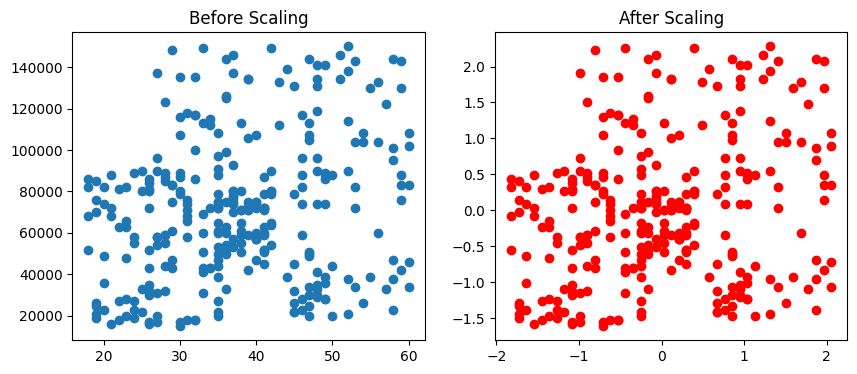

In [152]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After Scaling')
plt.show()

In [ ]:
lr = LogisticRegression() 
lr_scaled = LogisticRegression()

In [154]:
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [155]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [ ]:
print("Original:", accuracy_score(y_test, y_pred)) # implicitly scales in newer versions
print("Scaled:", accuracy_score(y_test, y_pred_scaled))

Original: 0.88
Scaled: 0.88
